
                                                           Data Science II
                                               Assignment 1: Ensemble Learning in Action

 We first import the basic libraries to our Jupiter Notebook which will help in our analysis and deciphering results.

In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
import time # to measure how long the models take
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.tree import plot_tree
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier


In [234]:
pip install imbalanced-learn



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [235]:
from imblearn.over_sampling import SMOTE


Extract the Banking data set from your local file on the computer extracted from the Kaggle link. Since there is both train and test data available, I extracted both and named them as 'df_train' for 'train' data and 'df_test' for 'test' data. 

In [236]:
df_train = pd.read_csv('/Users/pratiksha/Downloads/archive (5)/train.csv',sep=';')

I printed the dataframe df_train to check how it looks.

In [237]:
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


I used the below function to display the first few rows of the DataFrame 'df', providing a preview of the data.

In [238]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


I used the info() function which provides a concise summary of our DataFrame, including its column names, data types, and non-null values.

In [239]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


I used the describe() function to generate descriptive statistics of the df_train, such as count, mean, standard deviation, minimum, maximum, and quartile values, for each numerical column.

In [240]:
df_train.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


The below code will count the number of missing (NaN or None) values in each column of the DataFrame df_train. 

In [241]:
df_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

The below code is used to print the dimensions or size of the DataFrame.

In [242]:
print('Train data size: ', df_train.shape)

Train data size:  (45211, 17)


The below code is used to extract the column names of the DataFrame df_train and store them in the variable columns. It will display an array or list of the column names present in the DataFrame. 

In [243]:
columns = df_train.columns.values
print(columns)

['age' 'job' 'marital' 'education' 'default' 'balance' 'housing' 'loan'
 'contact' 'day' 'month' 'duration' 'campaign' 'pdays' 'previous'
 'poutcome' 'y']


The below code iterates through each column in the DataFrame df_train, prints the column name, displays the unique values in that column, and then separates each column's information with a line of dashes. This code is used to examine and display the unique values present in each column of the DataFrame for data exploration and understanding.

In [244]:
for i in df_train.columns:
    print("Column Name:", i)
    print(df_train[i].unique())
    print("------------------------------")

Column Name: age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
------------------------------
Column Name: job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
------------------------------
Column Name: marital
['married' 'single' 'divorced']
------------------------------
Column Name: education
['tertiary' 'secondary' 'unknown' 'primary']
------------------------------
Column Name: default
['no' 'yes']
------------------------------
Column Name: balance
[ 2143    29     2 ...  8205 14204 16353]
------------------------------
Column Name: housing
['yes' 'no']
------------------------------
Column Name: loan
['no' 'yes']
------------------------------
Column Name: contact
['unknown' 'cellular' 'telep

I will do the same things for the test data and store it as 'df_test' and then perform the same codes to get an overview of the test data, even though it is not required for our analysis.

In [245]:
df_test= pd.read_csv('/Users/pratiksha/Downloads/archive (5)/test.csv',sep=';')

In [246]:
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [247]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [248]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [249]:
df_test.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [250]:
df_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [251]:
print('Test data size: ', df_test.shape)

Test data size:  (4521, 17)


In [252]:
columns = df_test.columns.values
print(columns)

['age' 'job' 'marital' 'education' 'default' 'balance' 'housing' 'loan'
 'contact' 'day' 'month' 'duration' 'campaign' 'pdays' 'previous'
 'poutcome' 'y']


In [253]:
for i in df_test.columns:
    print("Column Name:", i)
    print(df_test[i].unique())
    print("------------------------------")

Column Name: age
[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]
------------------------------
Column Name: job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
------------------------------
Column Name: marital
['married' 'single' 'divorced']
------------------------------
Column Name: education
['primary' 'secondary' 'tertiary' 'unknown']
------------------------------
Column Name: default
['no' 'yes']
------------------------------
Column Name: balance
[ 1787  4789  1350 ...  -333 -3313  1137]
------------------------------
Column Name: housing
['no' 'yes']
------------------------------
Column Name: loan
['no' 'yes']
------------------------------
Column Name: contact
['cellular' 'unknown' 'telephone']
------------------------

### Part 1: Data Preprocessing 

I saw that the train data doesn't have any null/ missing values so dropping values is not required. However, some columns have 'unknown' values which need to be imputed and the best technique to impute categorical columns is with the 'mode' of the remaining values.

We have to deal with four categorical columns, having values "unknown" and decide what needs to be done for each column.
1. Job
2. Contact
3. Education
4. Poutcome

The below function, calculating_jobs, calculates and prints the percentage of "unknown" values in specific columns of a DataFrame (df_train). It calculates and displays the percentage of "unknown" values in the "job," "education," "poutcome," and "contact" columns relative to the total number of rows in the DataFrame. Each percentage represents the proportion of "unknown" values in their respective columns, providing insights into the data's completeness and potential data quality issues.

In [254]:
def calculating_jobs(df_train):
    
    print('The % of unknown in job is', 100 * len(df_train[df_train['job']=='unknown']) / df_train.shape[0])
    print('The % of unknown in education is', 100 * len(df_train[df_train['education']=='unknown']) / df_train.shape[0])
    print('The % of unknown in poutcome is', 100 * len(df_train[df_train['poutcome']=='unknown']) / df_train.shape[0])
    print('The % of unknown in contact is', 100 * len(df_train[df_train['contact']=='unknown']) / df_train.shape[0])
    print("--------------------------------------------------------------------------------------------------")

In [255]:
calculating_jobs(df_train)

The % of unknown in job is 0.6370131162770122
The % of unknown in education is 4.1074074893278185
The % of unknown in poutcome is 81.74780473778505
The % of unknown in contact is 28.798301298356595
--------------------------------------------------------------------------------------------------


1. Job

The below code is used to impute missing values ('unknown') in the 'job' column of the DataFrame df_train with the mode (most frequent category) of the non-missing values in the same column.

In [256]:
job_mode = df_train[df_train['job'] != 'unknown']['job'].mode()[0]
df_train['job'].replace('unknown', job_mode, inplace=True)

The code below is used to extract and print the unique values in the 'job' column of the DataFrame df_train just to cross verify if all the 'unknown' columns have been imputed.

In [257]:
unique_values = df_train['job'].unique()
print(unique_values)

['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']


2. Contact

The below code is used to impute missing values ('unknown') in the 'contact' column of the DataFrame df_train with the mode (most frequent category) of the non-missing values in the same column.

In [258]:
contact_mode = df_train[df_train['contact'] != 'unknown']['contact'].mode()[0]
df_train['contact'].replace('unknown', contact_mode, inplace=True)

The below code is used to extract and print the unique values in the 'contact' column of the DataFrame df_train just to cross verify if all the 'unknown' columns have been imputed.

In [259]:
unique_values = df_train['contact'].unique()
print(unique_values)

['cellular' 'telephone']


3. Education

The below code is used to impute missing values ('unknown') in the 'education' column of the DataFrame df_train with the mode (most frequent category) of the non-missing values in the same column. 

In [260]:
education_mode = df_train[df_train['education'] != 'unknown']['education'].mode()[0]
df_train['education'].replace('unknown', education_mode, inplace=True)

The below code is used to extract and print the unique values in the 'education' column of the DataFrame df_train just to cross verify if all the 'unknown' columns have been imputed.

In [261]:
unique_values = df_train['education'].unique()
print(unique_values)

['tertiary' 'secondary' 'primary']


4. Poutcome

For the column poutcome, I saw that majority of the values are 'unknown' or 'other' which are approximately 80% and so if we impute them by the 'mode' of 'success' and 'failure' it will make the data a lot biased which will not be the right way to do it and will further hamper with our analysis so I decided to drop the entire column to avoid the bias and get concrete results. The below code will delete the 'poutcome' column from the dataset.

In [262]:
df_train.drop(columns=['poutcome'], inplace=True)

I am checking the train dataset after removing the column.

In [263]:
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,no


### UNIVARIATE ANALYSIS

This code below creates side-by-side box plots for three numeric variables ('campaign', 'pdays', 'previous') in the DataFrame df_train, showing their distribution with respect to the target variable 'y'. It uses a loop to automate the creation of the subplots and titles, resulting in a more concise and flexible visualization.

<Axes: xlabel='y', ylabel='previous'>

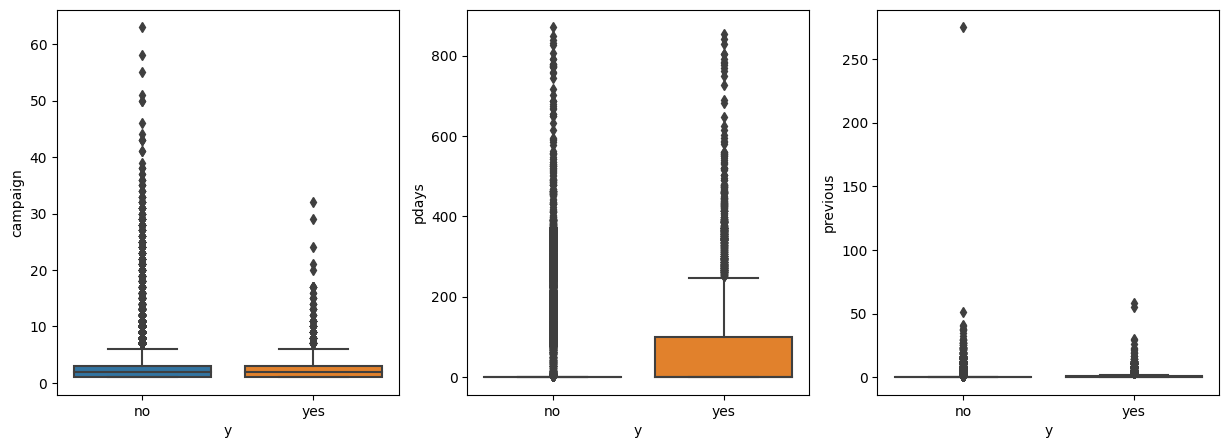

In [264]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='y',y='campaign', data=df_train, ax=ax1)
sns.boxplot(x='y',y='pdays',data=df_train, ax=ax2)
sns.boxplot(x='y',y='previous', data=df_train, ax=ax3)

I saw after the visualisation that there is a clear outlier in the 'previous' column. The below code filters the DataFrame df_train to keep only the rows where the 'previous' column has values less than or equal to 250. In other words, it retains only the rows that meet this condition and assigns the resulting filtered DataFrame back to the variable df_train. All rows that don't satisfy this condition are removed from the DataFrame.

In [265]:
df_train = df_train[df_train['previous'] <= 250]

Now, I ran the code again to check if the outlier has been removed.

<Axes: xlabel='y', ylabel='previous'>

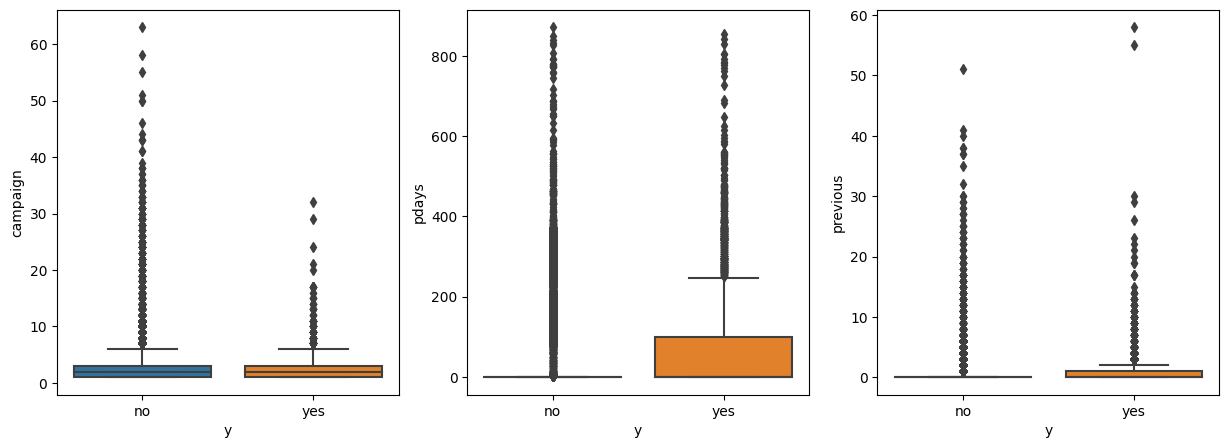

In [266]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='y',y='campaign', data=df_train, ax=ax1)
sns.boxplot(x='y',y='pdays',data=df_train, ax=ax2)
sns.boxplot(x='y',y='previous', data=df_train, ax=ax3)

Similarly, the below code creates three side-by-side box plots for numeric variables ('age', 'balance', 'duration') in the DataFrame df_train, showing their distribution with respect to the target variable 'y'. It uses subplots and Seaborn's boxplot function for visualization.

<Axes: xlabel='y', ylabel='duration'>

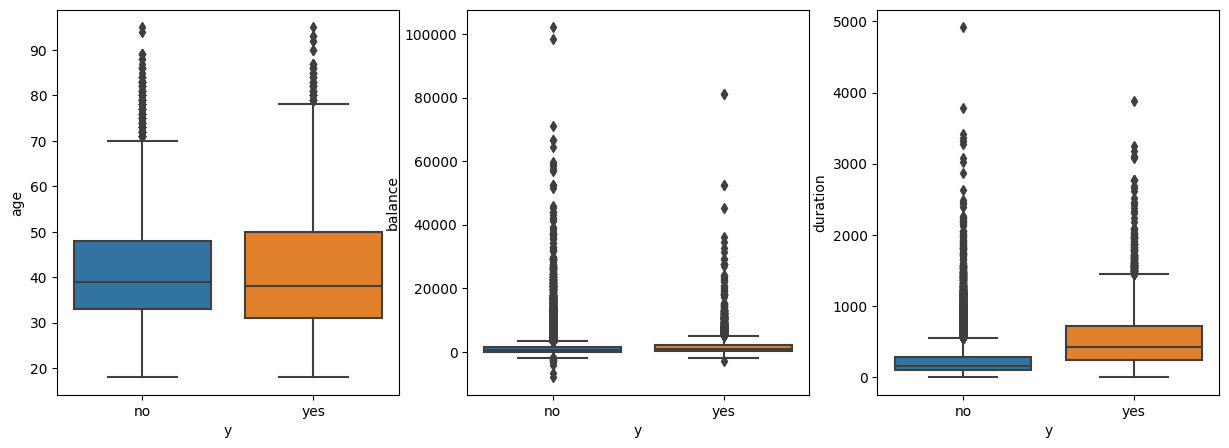

In [267]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='y',y='age', data=df_train, ax=ax1)
sns.boxplot(x='y',y='balance',data=df_train, ax=ax2)
sns.boxplot(x='y',y='duration', data=df_train, ax=ax3)

The below code creates three side-by-side histograms for numeric variables ('age', 'balance', 'duration') in the DataFrame df_train. It uses subplots and Seaborn's histplot function to visualize the distribution of each variable individually.

<Axes: xlabel='duration', ylabel='Count'>

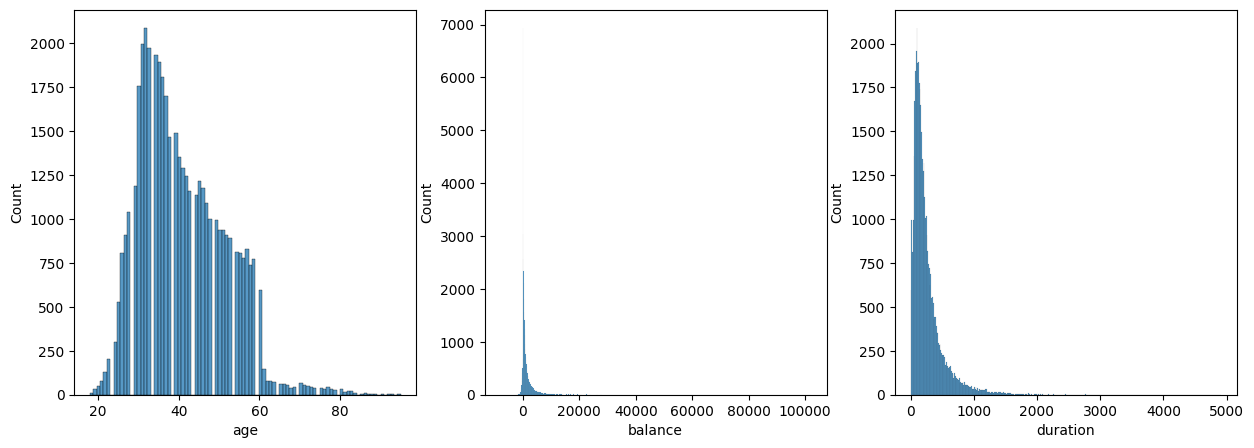

In [268]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df_train['age'], ax=ax1)
sns.histplot(df_train['balance'], ax=ax2)
sns.histplot(df_train['duration'], ax=ax3)

The below code creates three side-by-side histograms for the numeric variables ('campaign', 'pdays', 'previous') in the DataFrame df_train. It uses subplots and Seaborn's histplot function to visualize the distribution of each variable individually.

<Axes: xlabel='previous', ylabel='Count'>

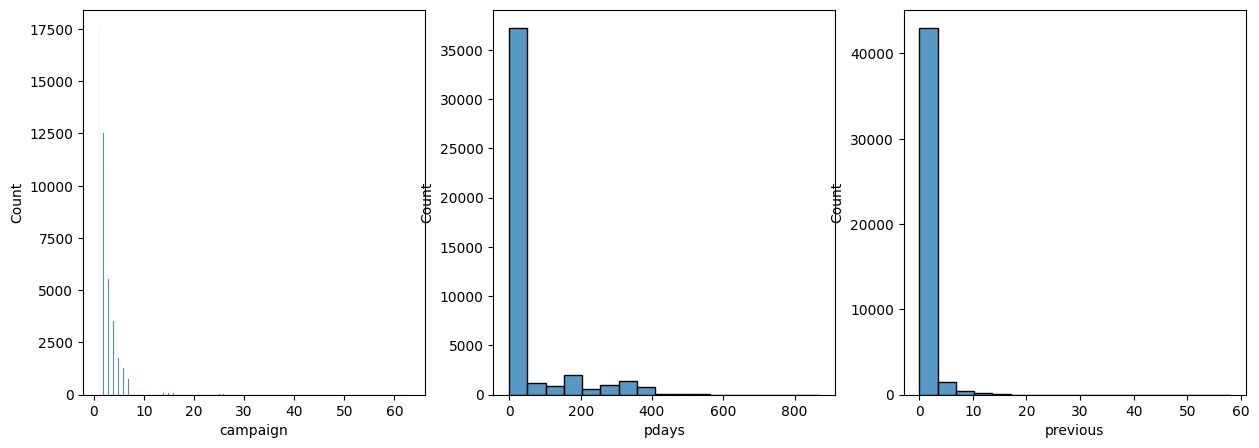

In [269]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df_train['campaign'], ax=ax1)
sns.histplot(df_train['pdays'], ax=ax2)
sns.histplot(df_train['previous'], ax=ax3)

The below code creates a density plot (KDE) of 'age' because it visually represents the distribution of data, allowing to see the spread of a numeric variable like 'age.' It's particularly valuable for spotting patterns, identifying skewness, and comparing distributions across different groups or categories, making it a key tool for exploratory data analysis and data visualization.

Text(0.5, 1.0, 'Density Plot of Age')

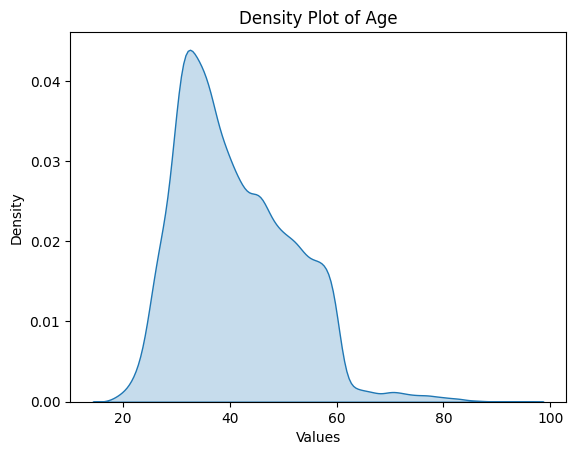

In [270]:
sns.kdeplot(df_train['age'], shade=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Plot of Age')

The below code creates a row of three pie charts side by side in a single figure. Each pie chart represents the distribution of a categorical variable ('default,' 'housing,' and 'loan') from the DataFrame df_train. Pie charts are useful for visualizing the proportion of each category within a categorical variable, allowing us to quickly understand the distribution of binary or nominal data. In this case, there are three binary variable columns so I used pie charts to visually analyse them.

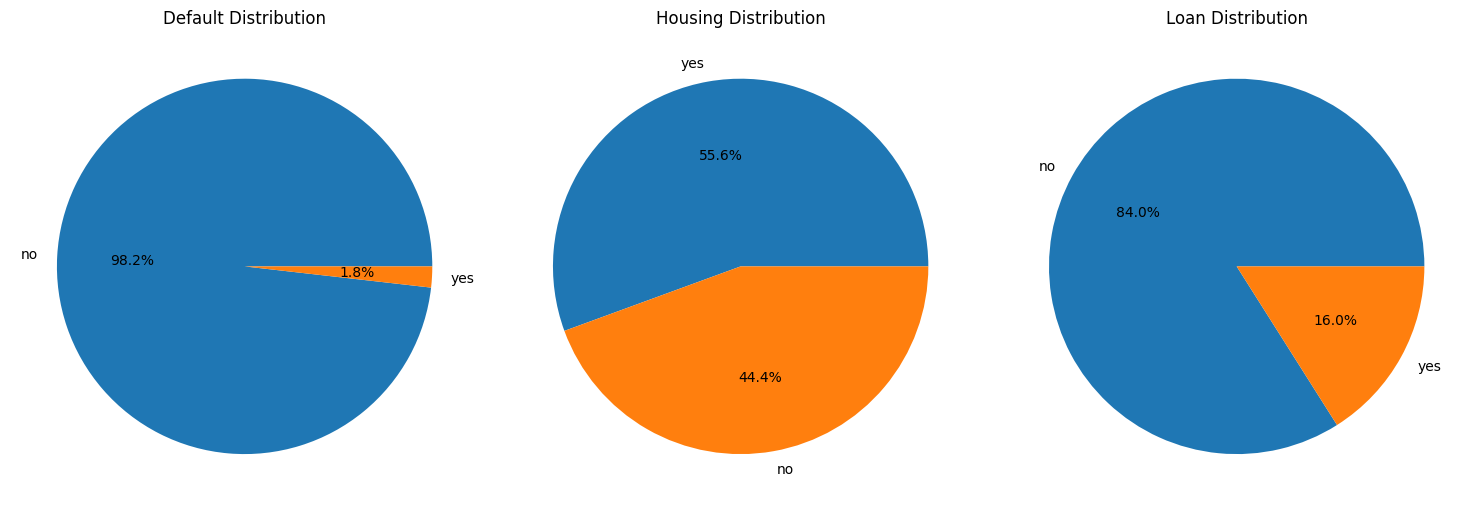

In [271]:
# Create subplots with 1 row and 3 columns to display all pie charts side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Pie chart for 'default'
default_counts = df_train['default'].value_counts()
axes[0].pie(default_counts, labels=default_counts.index, autopct='%1.1f%%')
axes[0].set_title('Default Distribution')

# Pie chart for 'housing'
housing_counts = df_train['housing'].value_counts()
axes[1].pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%')
axes[1].set_title('Housing Distribution')

# Pie chart for 'loan'
loan_counts = df_train['loan'].value_counts()
axes[2].pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%')
axes[2].set_title('Loan Distribution')

# Adjust the layout
plt.tight_layout()

# Show all pie charts
plt.show()

The below code generates a bar plot using Seaborn to visualize the distribution of different job categories in the dataset 'df_train.' Each bar represents a job category, and the height of the bar corresponds to the count of individuals in that category. The plot is labeled and titled, making it easy to understand at a glance. By rotating the x-axis labels for readability, it offers a clear overview of the distribution of jobs among the dataset's entries, providing insights into the job composition.

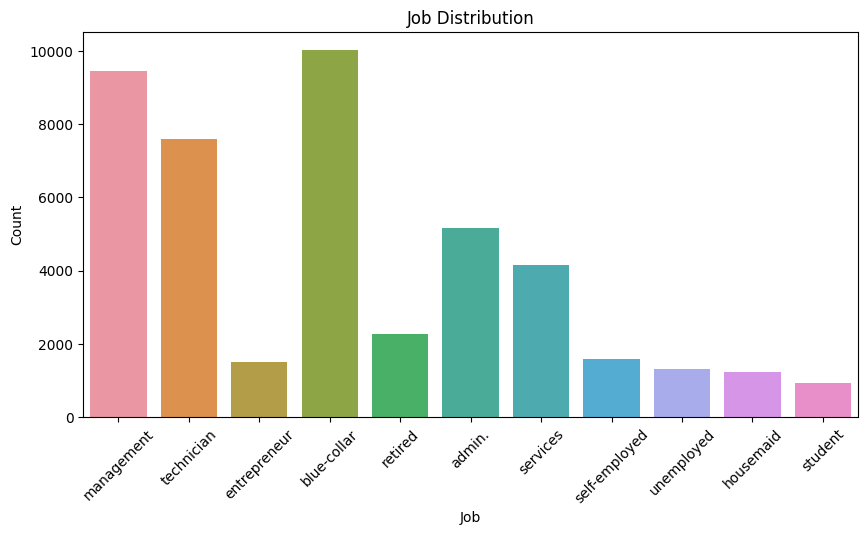

In [272]:
# Bar plot for 'job'
plt.figure(figsize=(10, 5))
sns.countplot(data=df_train, x='job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Job Distribution')
plt.xticks(rotation=45)
plt.show()

The below code generates a bar plot using Seaborn to display the distribution of marital statuses in the dataset 'df_train.' Each bar represents a different marital status category, and the height of the bars indicates the count of individuals within each category. The plot is labeled and titled for clarity, and the x-axis labels are rotated for readability. This visualization provides a quick and clear overview of the distribution of marital statuses among the dataset's entries, facilitating an understanding of the marital status composition.

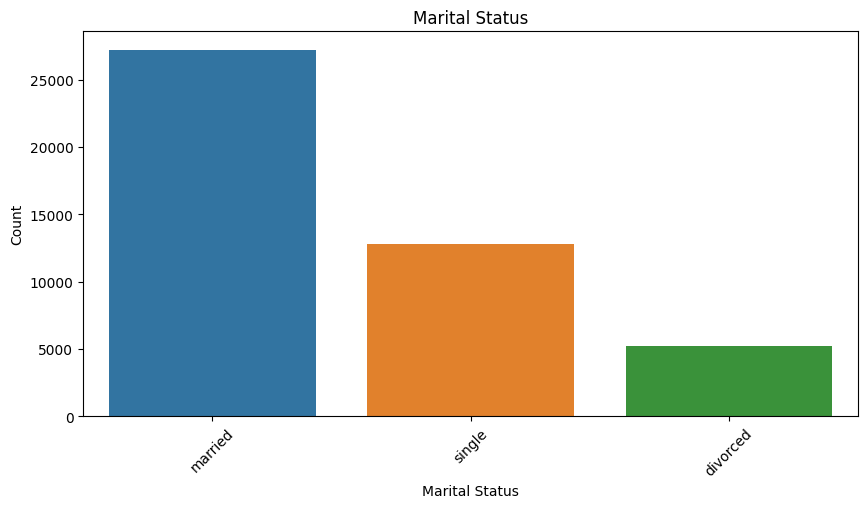

In [273]:
# Bar plot for 'marital'
plt.figure(figsize=(10, 5))
sns.countplot(data=df_train, x='marital')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status')
plt.xticks(rotation=45)
plt.show()

The below code creates a bar plot using Seaborn to represent the distribution of education levels in the dataset 'df_train.' Each bar corresponds to a different education level, and the bar's height indicates the count of individuals with that level of education. The plot is well-labeled and titled, enhancing clarity, and the x-axis labels are rotated for readability. This visualization offers a straightforward view of the educational composition within the dataset, making it easy to grasp the distribution of education levels among the individuals.

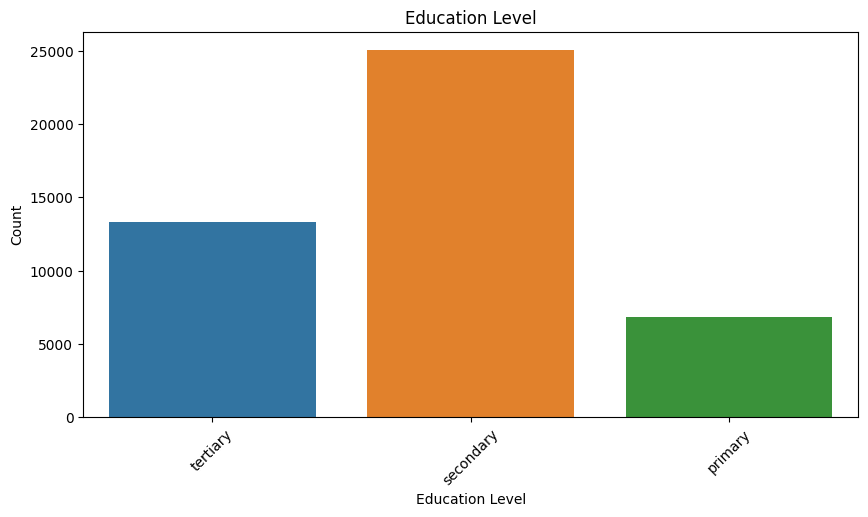

In [274]:
# Bar plot for 'education'
plt.figure(figsize=(10, 5))
sns.countplot(data=df_train, x='education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level')
plt.xticks(rotation=45)
plt.show()

The below code generates a bar plot using Seaborn to depict the distribution of contact communication types in the dataset 'df_train.' Each bar represents a specific communication type, and the height of each bar signifies the count of occurrences for that communication type. The plot is well-labeled and titled for clarity, and the x-axis labels are rotated to improve readability. This visualization provides a clear and concise representation of how different communication types are distributed within the dataset, facilitating an understanding of the dataset's contact communication characteristics.

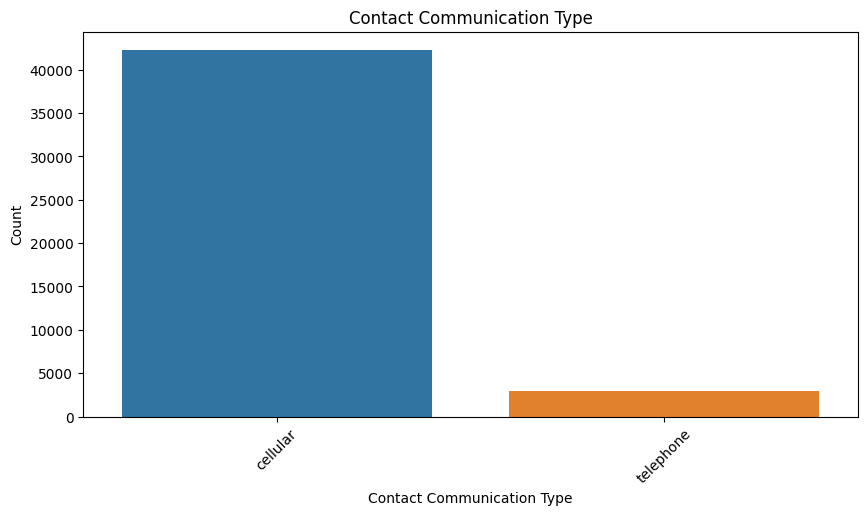

In [275]:
# Bar plot for 'contact'
plt.figure(figsize=(10, 5))
sns.countplot(data=df_train, x='contact')
plt.xlabel('Contact Communication Type')
plt.ylabel('Count')
plt.title('Contact Communication Type')
plt.xticks(rotation=45)
plt.show()

The below code creates a bar plot using Seaborn to illustrate the distribution of the last contact month of the year in the dataset 'df_train.' In this visualization, each bar corresponds to a specific month, and the bar's height represents the count of occurrences for that month. The plot is well-labeled and titled for clarity, with x-axis labels rotated for improved readability. This visualization offers an easy-to-understand view of how contacts were distributed across different months of the year, helping to identify patterns or trends related to the timing of contacts.

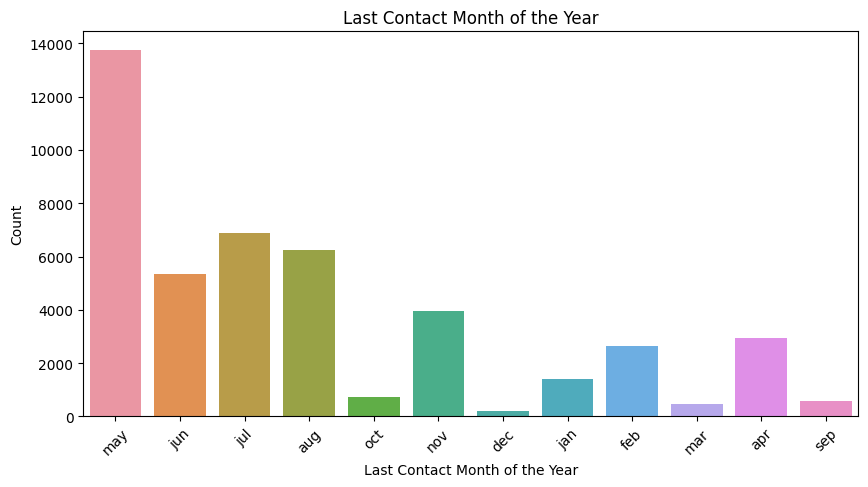

In [276]:
# Bar plot for 'month'
plt.figure(figsize=(10, 5))
sns.countplot(data=df_train, x='month')
plt.xlabel('Last Contact Month of the Year')
plt.ylabel('Count')
plt.title('Last Contact Month of the Year')
plt.xticks(rotation=45)
plt.show()

### BIVARIATE ANALYSIS

The code below creates a countplot using Seaborn, visualizing the distribution of job categories on the x-axis while differentiating the count of "0" and "1" values in the "y" target variable using different colors (hue). It helps analyze how job categories relate to the target variable, providing insights into how different jobs might influence the likelihood of a "1" or "0" outcome.

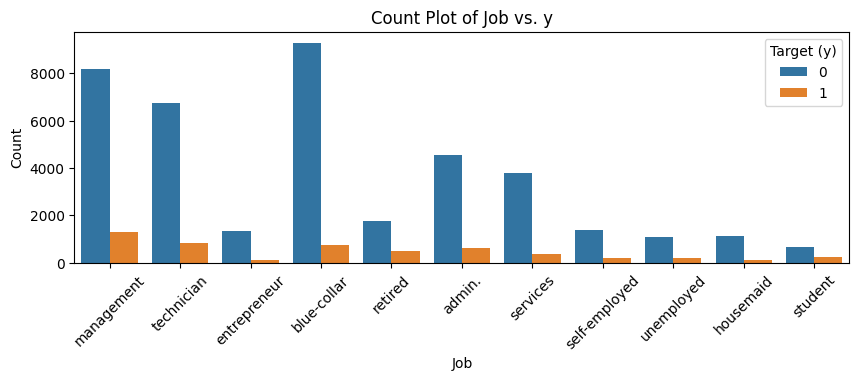

In [288]:
# Create a countplot
plt.figure(figsize=(10, 3))
sns.countplot(data=df_train, x='job', hue='y')
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Count Plot of Job vs. y')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Target (y)', labels=['0', '1'])
plt.show()


It is evident that people working in the management sector have mostly applied for a term deposit while entrepreneurs and housemaids are the least ones to apply.

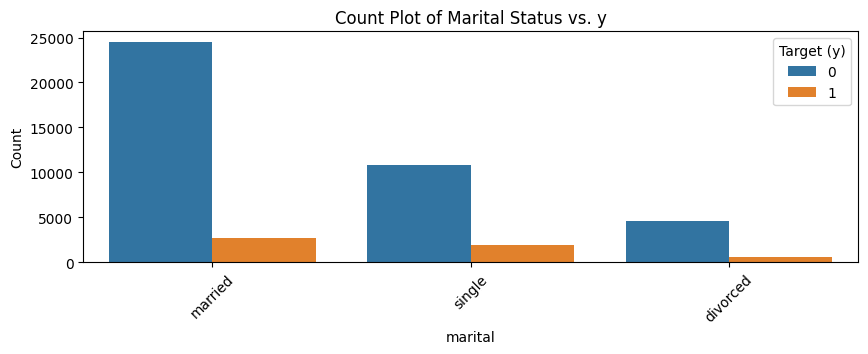

In [289]:
# Create a countplot
plt.figure(figsize=(10,3))
sns.countplot(data=df_train, x='marital', hue='y')
plt.xlabel('marital')
plt.ylabel('Count')
plt.title('Count Plot of Marital Status vs. y')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Target (y)', labels=['0', '1'])
plt.show()

Majority of married poeple have applied for the term deposit however not many divorced people have.

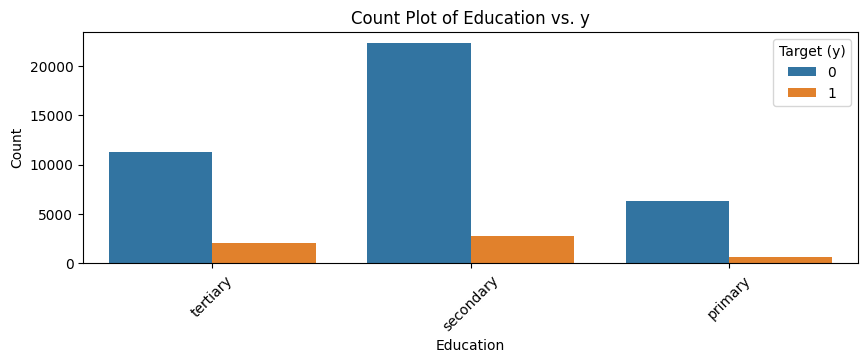

In [290]:
# Create a countplot
plt.figure(figsize=(10,3))
sns.countplot(data=df_train, x='education', hue='y')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Count Plot of Education vs. y')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Target (y)', labels=['0', '1'])
plt.show()

The people with secondary education have majorly applied for the term deposit and least has been applied by people in the primary sector.

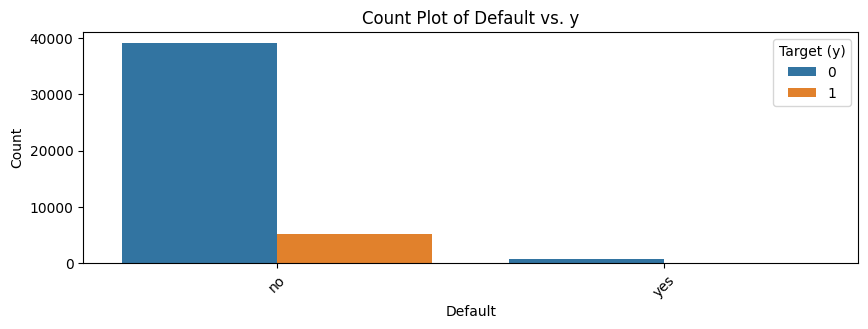

In [291]:
# Create a countplot
plt.figure(figsize=(10,3))
sns.countplot(data=df_train, x='default', hue='y')
plt.xlabel('Default')
plt.ylabel('Count')
plt.title('Count Plot of Default vs. y')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Target (y)', labels=['0', '1'])
plt.show()

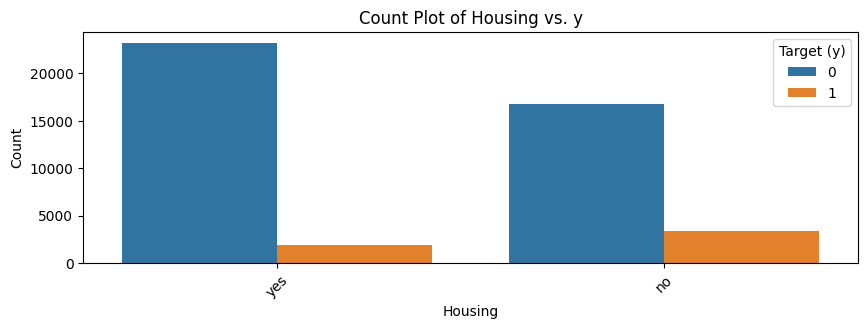

In [292]:
# Create a countplot
plt.figure(figsize=(10,3))
sns.countplot(data=df_train, x='housing', hue='y')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.title('Count Plot of Housing vs. y')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Target (y)', labels=['0', '1'])
plt.show()

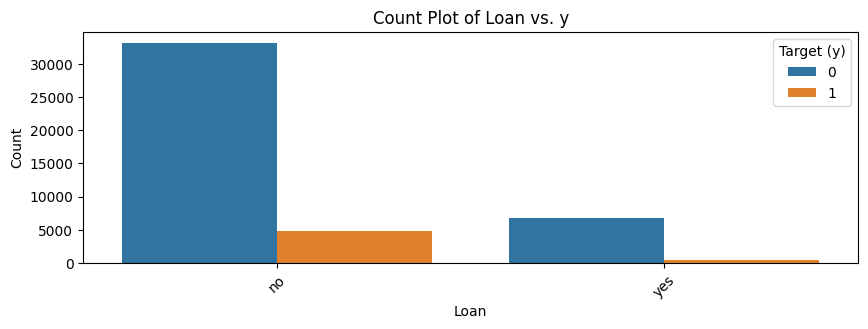

In [293]:
# Create a countplot
plt.figure(figsize=(10,3))
sns.countplot(data=df_train, x='loan', hue='y')
plt.xlabel('Loan')
plt.ylabel('Count')
plt.title('Count Plot of Loan vs. y')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Target (y)', labels=['0', '1'])
plt.show()

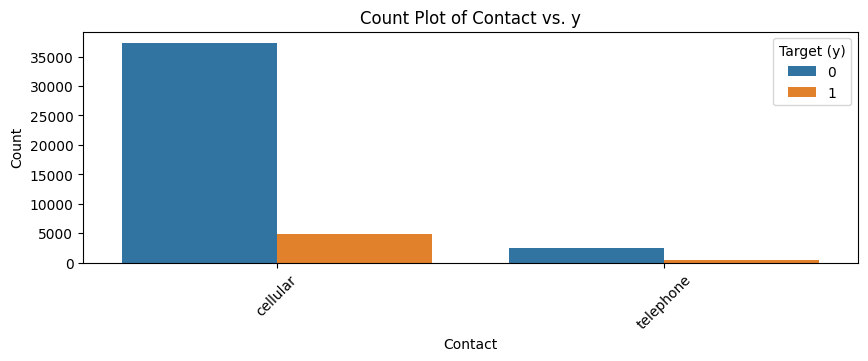

In [294]:
# Create a countplot
plt.figure(figsize=(10,3))
sns.countplot(data=df_train, x='contact', hue='y')
plt.xlabel('Contact')
plt.ylabel('Count')
plt.title('Count Plot of Contact vs. y')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Target (y)', labels=['0', '1'])
plt.show()

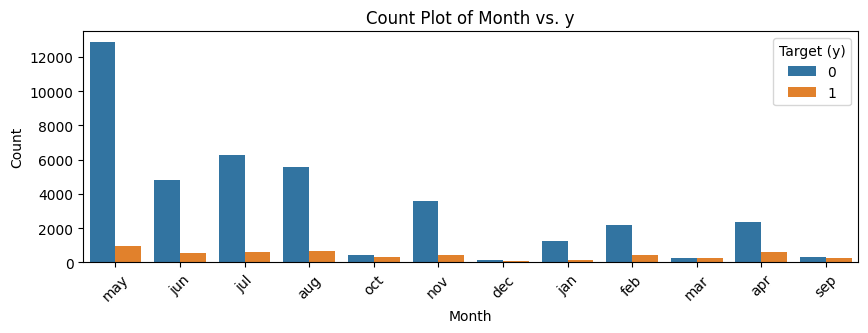

In [295]:
# Create a countplot
plt.figure(figsize=(10,3))
sns.countplot(data=df_train, x='month', hue='y')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count Plot of Month vs. y')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Target (y)', labels=['0', '1'])
plt.show()

The below code generates a grouped count plot using Seaborn, comparing two categorical columns, 'job' and 'education,' with 'job' on the x-axis. Each job category is further divided into subcategories based on education levels, and the bars represent the count of individuals within each combination. This analysis allows us to visualize how different jobs are distributed across various education levels, providing insights into potential relationships or disparities between job categories and education backgrounds within the dataset. It helps identify patterns or dependencies between these two categorical variables.

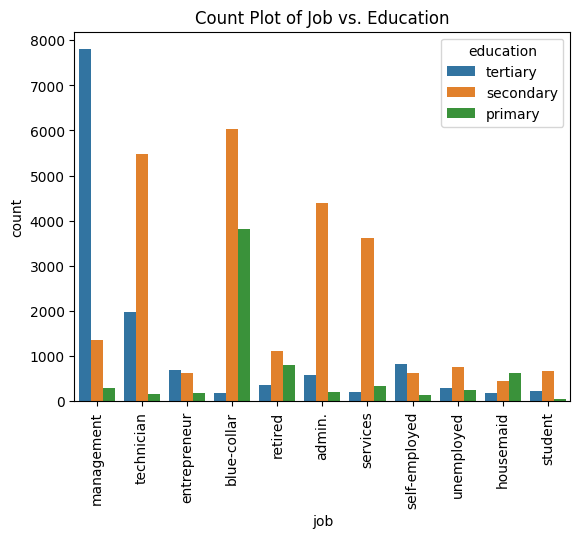

In [ ]:
sns.countplot(data=df_train, x='job', hue='education', width=0.8)  
plt.title('Count Plot of Job vs. Education')
plt.xticks(rotation=90)  
plt.show()

I analysed that majority of the people from the tertiary sector are employed in the management sector jobs while the minority is in a blue-collar job or housemaids. Majority of people from the secondary education are emplyed in blue-collared jobs while minority are housemaids. The majority of primaruy education holders are also employed in the blue-collared jobs while minority are students.

The below code creates a grouped count plot using Seaborn, comparing the 'job' and 'marital' categorical columns. 'Job' categories are displayed on the x-axis, and each job category is further divided by 'marital' status, represented by different colors within each bar. The plot provides insights into how various job categories are distributed across different marital statuses, highlighting potential relationships or disparities. It's a visual analysis tool for understanding the distribution of jobs based on marital status within the dataset.

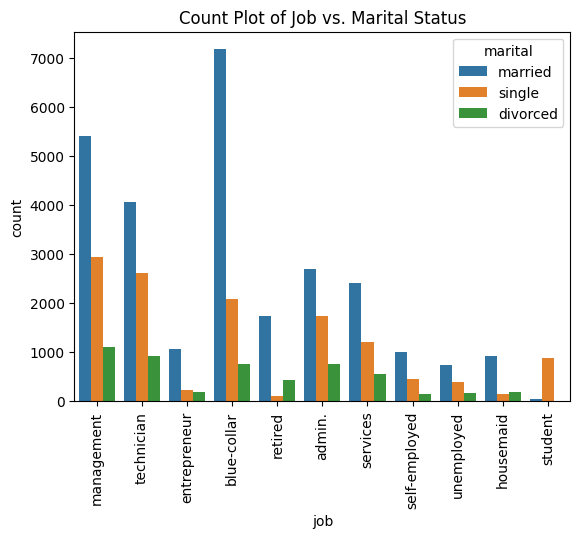

In [ ]:
sns.countplot(data=df_train, x='job', hue='marital', width=0.8)  
plt.title('Count Plot of Job vs. Marital Status')
plt.xticks(rotation=90)  
plt.show()

I analysed that majority of blue-collared jobs people are married and majority of single and divorced people are employed in management jobs. 

The below code generates a grouped count plot using Seaborn, comparing the 'job' and 'contact' categorical columns. 'Job' categories are displayed on the x-axis, and each job category is further divided by 'contact' communication mode, represented by different colors within each bar. The plot provides insights into how different job categories are distributed based on the mode of communication, highlighting potential relationships or patterns. It's a visual analysis tool for understanding how job categories relate to the mode of communication within the dataset.

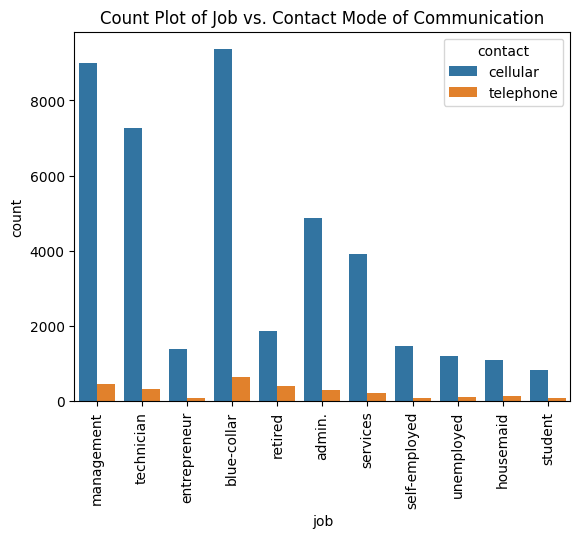

In [ ]:
sns.countplot(data=df_train, x='job', hue='contact', width=0.8) 
plt.title('Count Plot of Job vs. Contact Mode of Communication')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.show()

I analysed that majority of the blue-collared jobs people were contacted the most by either mode of communication while the least contacted were students from both mode of communication.

The below code generates a pair plot that displays scatterplots for selected numeric columns ('age,' 'balance,' 'duration,' 'campaign,' 'day') from the DataFrame df_train. Each scatterplot shows how two numeric variables relate to each other, helping us visualize potential correlations and patterns. Additionally, the points in the scatterplots are color-coded based on the values of the 'y' variable, allowing us to see how the binary outcome variable ('y') interacts with the numeric features. This can be useful for understanding how different numeric variables might influence the target variable or how they relate to each other in the context of our analysis.

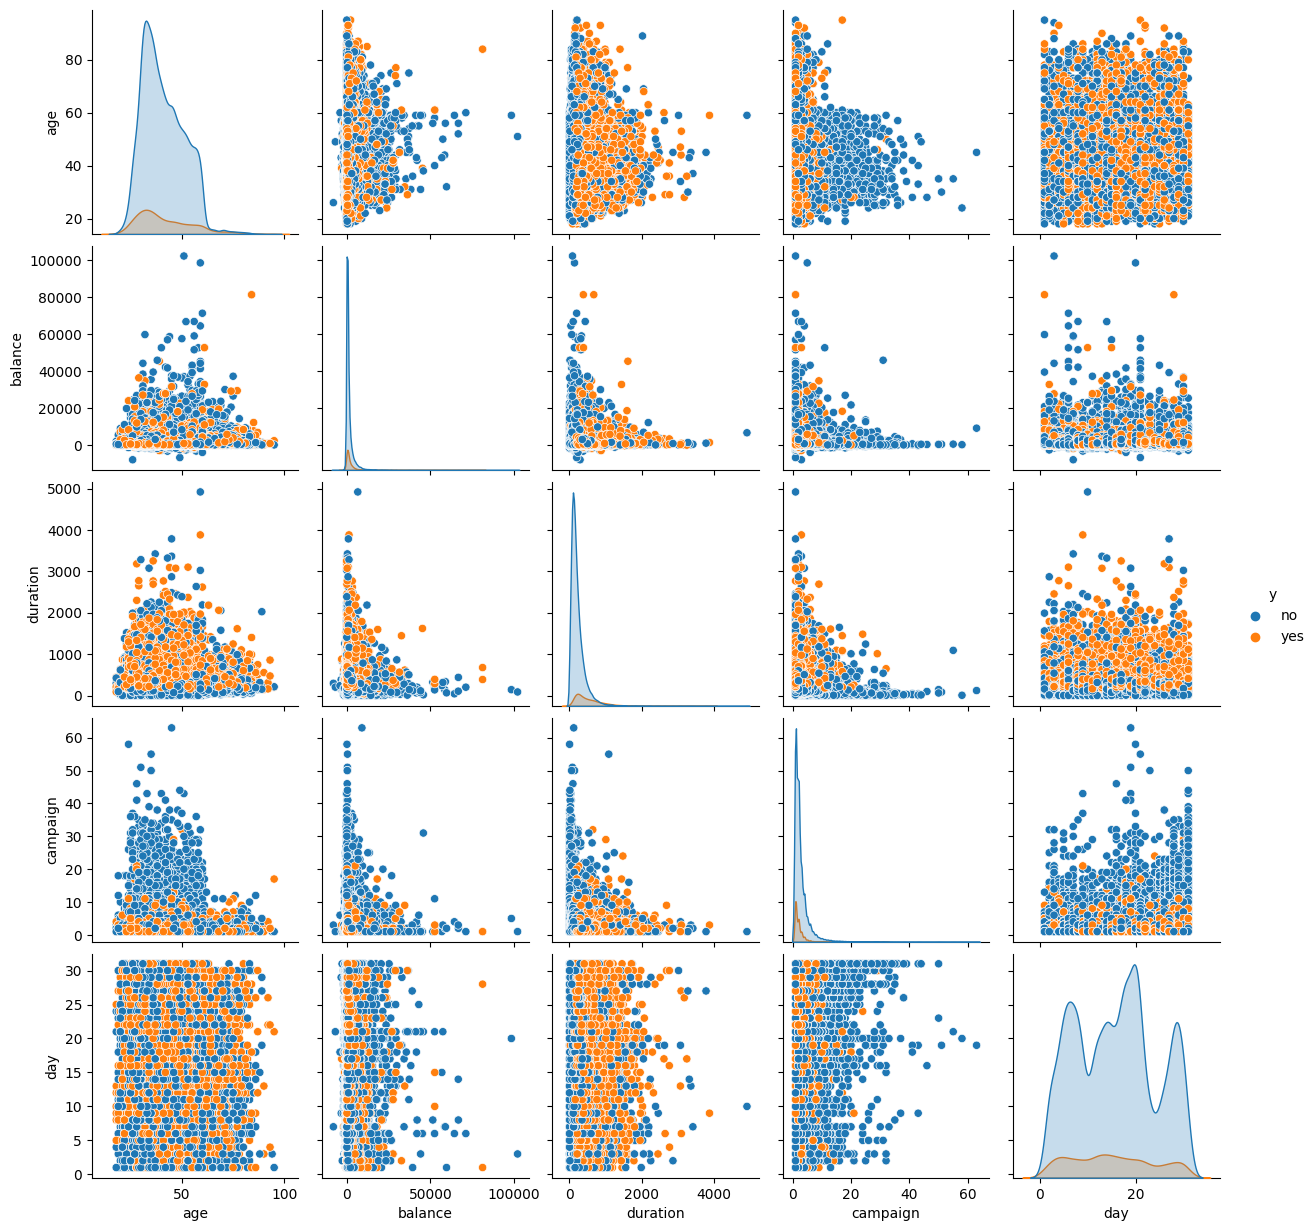

In [ ]:
# Pair plot for selected numeric columns
sns.pairplot(df_train[['age', 'balance', 'duration', 'campaign', 'day','y']], hue='y')

The below code performs a data aggregation operation. It groups the data in the DataFrame df_train by two categorical columns, 'job' and 'y' (likely representing a binary outcome). It then counts the occurrences of 'y' for each combination of 'job' categories and 'y' values (e.g., 'yes' and 'no'). The unstack() operation restructures the result into a tabular format with 'job' categories as columns and 'y' values as rows, showing the count of 'y' for each job category. This operation is useful for analyzing how job categories relate to the binary outcome 'y' and can reveal patterns or associations between job types and the likelihood of a positive outcome.

In [ ]:
df_train.groupby(['job','y'])['y'].count().unstack()

y,no,yes
job,,
admin.,4540,631
blue-collar,9278,742
entrepreneur,1364,123
housemaid,1131,109
management,8156,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


 The above output highlights the importance of job category as a potential predictor of subscription behavior. It suggests that certain job categories, such as 'management,' 'technician,' 'student,' and 'retired,' may be associated with higher subscription rates, while others, like 'blue-collar,' may have lower rates.

The below code groups the data in the DataFrame df_train by two categorical columns, 'education' and 'y' (likely representing a binary outcome). It then counts the occurrences of 'y' for each combination of 'education' categories and 'y' values (e.g., 'yes' and 'no').

In [ ]:
df_train.groupby(['education','y'])['y'].count().unstack()

y,no,yes
education,,
primary,6260,591
secondary,22357,2702
tertiary,11304,1996


The table highlights the potential impact of education level as a predictor of subscription behavior. It suggests that individuals with different education levels exhibit varying subscription rates, with 'tertiary' and 'unknown' education levels showing notable trends.

The below code groups the data in the DataFrame df_train by two categorical columns, 'default' (representing whether clients have credit in default) and 'y' (likely representing a binary outcome). It then counts the occurrences of 'y' for each combination of 'default' categories ('yes' and 'no') and 'y' values ('yes' and 'no').

In [ ]:
df_train.groupby(['default','y'])['y'].count().unstack()

y,no,yes
default,,
no,39158,5237
yes,763,52


The table highlights a significant relationship between default status and subscription outcomes. Customers with a credit default ('yes') are much less likely to subscribe, while customers without a credit default ('no') are much more likely to subscribe.

The below code groups and counts the occurrences of 'y' (binary outcome) for each combination of 'housing' status ('yes' and 'no'), providing insights into how housing loan status relates to the binary outcome 'y.'

In [ ]:
df_train.groupby(['housing','y'])['y'].count().unstack()

y,no,yes
housing,,
no,16727,3354
yes,23194,1935


The table highlights a notable relationship between housing loan status and subscription outcomes. Customers with housing loans are less likely to subscribe, while customers without housing loans are more likely to subscribe

The below code groups and counts the occurrences of 'y' (binary outcome) for each combination of 'loan' status ('yes' and 'no'), offering insights into how personal loan status relates to the binary outcome 'y.'

In [ ]:
df_train.groupby(['loan','y'])['y'].count().unstack()

y,no,yes
loan,,
no,33161,4805
yes,6760,484


The table highlights an association between personal loan status and subscription outcomes. Customers with personal loans are less likely to subscribe, while customers without personal loans are more likely to subscribe.

The below code groups and counts the occurrences of 'y' (binary outcome) for each combination of 'contact' communication type ('telephone,' 'cellular,' and 'unknown'), providing insights into how communication mode relates to the binary outcome 'y.'

In [ ]:
df_train.groupby(['contact','y'])['y'].count().unstack()

y,no,yes
contact,,
cellular,37405,4899
telephone,2516,390


The table highlights a relationship between the type of communication contact and subscription outcomes. Customers contacted via cellular communication are more likely to subscribe, while those contacted via telephone are less likely to subscribe.

The code below groups and counts the occurrences of 'y' (binary outcome) for each combination of 'month' (last contact month of the year) and 'y' values ('yes' and 'no'), offering insights into how the timing of contacts in different months relates to the binary outcome 'y.'

In [ ]:
df_train.groupby(['month','y'])['y'].count().unstack()

y,no,yes
month,,
apr,2355,577
aug,5559,688
dec,114,100
feb,2207,441
jan,1261,142
jul,6268,627
jun,4795,546
mar,229,248
may,12841,925


The table highlights the potential influence of the contact month on subscription outcomes. Certain months, such as March, December, and October, appear to be associated with higher subscription rates, while others, like May and August, have lower subscription rates

The below code groups and counts the occurrences of 'y' (binary outcome) for each combination of marital status ('married,' 'divorced,' 'single') and 'y' values ('yes' and 'no'), providing insights into how marital status relates to the binary outcome 'y.'

In [ ]:
df_train.groupby(['marital','y'])['y'].count().unstack()

y,no,yes
marital,,
divorced,4585,622
married,24458,2755
single,10878,1912


These statistics provide a summary of how different marital statuses relate to the subscription ('yes' or 'no') to a term deposit. This information highlights varying subscription patterns across marital statuses, with 'married' individuals having the highest count of non-subscribers ('no').

### Part 2: Build Baseline Models

In the below code, we are preparing the data for a machine learning task:

y: It represents the target variable, which is extracted from the DataFrame df_train using the column name "y." This variable typically contains the labels or outcomes you want to predict, such as whether a client subscribes to a term deposit ("yes" or "no").

X: It represents the feature matrix, which is created by dropping the "y" column from the DataFrame df_train using df_train.drop("y", axis=1). This variable contains the input features or attributes used to make predictions for the target variable.

By separating the target variable (y) from the feature matrix (X), I prepared the data for machine learning algorithms, making it ready for model training and evaluation.

The below code creates a copy of the original DataFrame df_train called df_copy. It then separates the target variable "y" from df_copy and assigns it to the variable y. The remaining columns in df_copy are assigned to a new DataFrame X, which represents the feature variables used for machine learning. This separation is a common preprocessing step for machine learning tasks, enabling the model to predict the target variable based on the features.

In [ ]:
df_copy = df_train.copy()
df_copy.head()
y = df_copy.pop("y")
X = df_copy.copy()

In the below code, I am identifying numerical and categorical columns in the DataFrame X.

num_cols: This variable contains the column names of features with data types 'float64' or 'int64,' representing numerical data such as age, balance, etc.

cat_cols: This variable contains the column names of features with data type 'object,' indicating categorical data like job type, marital status, etc.

This separation of columns into numerical and categorical helps in preprocessing and applying different transformations or encoding techniques based on the data type, as numerical and categorical data require different handling in machine learning tasks.

In [ ]:
# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

The below code standardizes the numerical columns in the DataFrame df_train using the StandardScaler from scikit-learn. It also one-hot encodes the categorical columns, creating binary columns for each category and dropping the first column to avoid multicollinearity issues. The standardized numerical data and one-hot encoded categorical data are combined into the DataFrame X, which is typically used as input for machine learning models. Standardization ensures that numerical features have a mean of 0 and a standard deviation of 1, while one-hot encoding converts categorical data into a numerical format suitable for modeling.

In [ ]:
scaler = StandardScaler()
X = pd.get_dummies(df_train, columns=cat_cols, drop_first=True)
X[num_cols] = scaler.fit_transform(df_train[num_cols])

This line of code removes the column labeled "y" from the DataFrame X. Typically, this is done when preparing data for a machine learning task, as the "y" column usually represents the target variable that the model is trying to predict. By dropping this column from the feature set (X), you ensure that the model does not have access to the target variable during training, which is necessary for supervised learning tasks.

In [ ]:
X = X.drop(columns=['y'])

There is a presence of what is called as 'Accuracy Paradox,' in the data. The accuracy paradox is a situation where a high level of accuracy in a classification model can be misleading, especially when dealing with imbalanced datasets. It occurs when a model predicts the majority class for all instances, resulting in a high accuracy rate. However, this high accuracy does not necessarily indicate a good model, as it may fail to detect the minority class, which could be of more significant interest in some applications. In such cases, alternative evaluation metrics like precision, recall, and F1-score are more informative than accuracy to assess the model's performance.

 To address this issue, we can explore the use of SMOTE

This code applies Synthetic Minority Over-sampling Technique (SMOTE) to balance the class distribution of the target variable y. SMOTE generates synthetic samples for the minority class (typically the less frequent class) to balance it with the majority class. It takes the feature set X and target variable y as input and returns X_train_resampled and y_train_resampled, which are modified versions of the original data with a balanced class distribution. This technique is commonly used to address class imbalance issues in classification tasks, ensuring that the machine learning model can learn from a more representative dataset.

In [ ]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

This line of code splits the resampled dataset into training and testing subsets. X_train_resampled and y_train_resampled represent the resampled feature set and target variable with balanced class distribution, respectively. By using the train_test_split function, it divides these datasets into training (X_train and y_train) and testing (X_test and y_test) subsets, where the testing subset comprises 20% of the resampled data. This splitting is essential for assessing the model's performance on unseen data during model evaluation and validation.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2)

### Part 3: Ensemble Modelling

In the below,I am setting up various machine learning models for comparison. These models will be trained and evaluated to compare their performance in solving a specific machine learning task.

In [ ]:
# Set up models to compare 

knn = KNeighborsClassifier(n_neighbors=10)
log_reg = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=20)
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
voting = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn), ('dt', dt)])

In the below code, I am creating a dictionary called classifiers where each key-value pair represents a machine learning classifier. This dictionary provides a convenient way to organize and reference multiple classifiers for training and evaluation purposes, making it easier to compare their performance in solving a machine learning task.

In [ ]:
classifiers = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'Voting': voting
}

The below code evaluates the performance of various machine learning classifiers using a common preprocessing pipeline. It initializes an empty dictionary to store results and then iterates through a list of classifiers, such as K-Nearest Neighbors, Logistic Regression, and others. For each classifier, it creates a pipeline combining data preprocessing and the classifier, fits the model to the training data, makes predictions on the test data, and computes key performance metrics like precision, recall, F1-score, and accuracy, considering 'yes' as the positive label. It also records the execution time for each classifier. The results are stored in a dictionary and converted into a DataFrame for easy comparison of classifier performance on the given machine learning task.

In [ ]:
# Initialize an empty results dictionary
results = {}

# Loop through list of models to compare performance
for name, clf in classifiers.items():
    start_time = time.time()
    
    '''# Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifiers', clf)])'''
    
    pipeline = Pipeline(steps=[('classifiers', clf)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Compute metrics with 'yes' as the positive label
    precision = precision_score(y_test, y_pred, pos_label='yes')
    recall = recall_score(y_test, y_pred, pos_label='yes')
    f1 = f1_score(y_test, y_pred, pos_label='yes')
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results for the current classifier in the results dictionary
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print(results_df)


                     Precision    Recall  F1-Score  Accuracy  Time (s)
K-Nearest Neighbors   0.874728  0.962245  0.916402  0.912643  1.566649
Logistic Regression   0.843673  0.819784  0.831557  0.834742  1.228398
Decision Tree         0.892153  0.905739  0.898895  0.898616  0.648129
Random Forest         0.920924  0.973194  0.946338  0.945081  5.608684
AdaBoost              0.879082  0.867355  0.873179  0.874632  4.265606
Bagging               0.918906  0.934055  0.926418  0.926169  2.739108
Voting                0.888217  0.942990  0.914785  0.912581  2.690926


### Part 4: Performance Comparison

The Banking Dataset outlines the context of a marketing campaign for term deposits by a Portuguese banking institution. The campaign involves phone calls to customers to determine if they will subscribe to a term deposit. After applying machine learning models to predict customer responses, the results were found as shown above.

To compare the performance of all models, several factors should be considered:

- Precision, Recall, and F1-Score: These metrics evaluate the models' accuracy, ability to identify positive cases, and overall performance.
- Time Required: The time each model takes to run is essential, especially in real-time or resource-constrained environments.

Based on the provided results, it appears that Random Forest has the highest F1-Score, indicating strong overall performance. However, it comes with a significant time cost. Decision Tree, Bagging, and Voting also perform well in terms of F1-Score while being relatively faster. Logistic Regression has the shortest execution time but with slightly lower F1-Score. The choice of the best model depends on the specific use case and trade-offs between performance and computation time.

The code below disables the display of UserWarnings, which are non-critical warning messages generated by Python libraries or code. It essentially suppresses these warnings from being shown, allowing the code to run without the interruption or display of these non-essential warning messages. It's commonly used when you want to prevent warnings from cluttering the output while running your code.

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

This code below automates hyperparameter tuning for a selection of machine learning classifiers using grid search. It defines hyperparameter grids for each classifier, sets up a dictionary to associate classifiers with their grids, and initializes an empty results dictionary. It then loops through each classifier, creating a pipeline that combines data preprocessing with the classifier, conducts grid search with cross-validation to find the best hyperparameters, and evaluates the model on test data, recording key performance metrics. The results, including the best hyperparameters and evaluation scores, are stored in a dictionary and converted into a DataFrame for easy analysis and comparison.

In [ ]:
# Import additional libraries
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids for tuning
knn_params = {'classifier__n_neighbors': [3, 5, 7, 20, 30, 50, 100]}
log_reg_params = {'classifier__C': [0.1, 1, 10]}
dt_params = {'classifier__max_depth': [10,20,30,40,50]}
rf_params = {'classifier__n_estimators': [50, 100, 150], 'classifier__max_depth': [None, 10, 20, 30, 50]}
ada_params = {'classifier__n_estimators': [25, 50, 75]}
bag_params = {'classifier__n_estimators': [5, 10, 20]}
voting_params = {'classifier__voting': ['hard', 'soft']}

params_dict = {
    'K-Nearest Neighbors': knn_params,
    'Logistic Regression': log_reg_params,
    'Decision Tree': dt_params,
    'Random Forest': rf_params,
    'AdaBoost': ada_params,
    'Bagging': bag_params,
    'Voting': voting_params
}

# Initialize results dictionary for tuned models
tuned_results = {}


# Loop through classifiers for tuning
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('classifier', clf)])
    
    # Create GridSearchCV object
    grid = GridSearchCV(pipeline, params_dict[name], cv=5)
    
    # Fit the model
    grid.fit(X_train, y_train)
    
    # Get the best estimator and predict
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Compute metrics with 'yes' as the positive label
    precision = precision_score(y_test, y_pred, pos_label='yes')
    recall = recall_score(y_test, y_pred, pos_label='yes')
    f1 = f1_score(y_test, y_pred, pos_label='yes')
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    tuned_results[name] = {
        'Best Params': grid.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df);


                                                           Best Params   
K-Nearest Neighbors                     {'classifier__n_neighbors': 3}  \
Logistic Regression                               {'classifier__C': 1}   
Decision Tree                            {'classifier__max_depth': 30}   
Random Forest        {'classifier__max_depth': None, 'classifier__n...   
AdaBoost                              {'classifier__n_estimators': 75}   
Bagging                               {'classifier__n_estimators': 20}   
Voting                                  {'classifier__voting': 'soft'}   

                    Precision    Recall  F1-Score    Time (s)  
K-Nearest Neighbors  0.881711  0.985905  0.930901   25.536807  
Logistic Regression  0.843673  0.819784  0.831557    6.645981  
Decision Tree        0.890121  0.909388  0.899651    8.604317  
Random Forest            0.92  0.972565  0.945552  294.966247  
AdaBoost             0.883414  0.875409  0.879393   51.272327  
Bagging              0.

### Part 5: Interpretation and Justification

1) Why did the ensemble models perform the way they did?

The ensemble models, including Random Forest, AdaBoost, Bagging, and Voting, are designed to improve predictive accuracy compared to individual base models like KNN, Logistic Regression and Decision Tree and by combining their outputs. Here's an explanation of why these ensemble models performed as they did:

Random Forest:

- Random Forest typically provides strong predictive performance due to its ensemble nature.
- It reduces overfitting by averaging multiple decision trees.
- However, it tends to be computationally intensive because it builds many decision trees in parallel.

AdaBoost (Adaptive Boosting):

- AdaBoost focuses on difficult-to-classify instances by assigning higher weights to them.
- It creates multiple weak classifiers (often decision trees) and combines them into a strong classifier.
- AdaBoost can adapt well to the data, improving its predictive performance.

Bagging (Bootstrap Aggregating):

- Bagging builds multiple base models (e.g., decision trees) independently and then combines their predictions.
- It reduces variance and often results in a more stable and accurate model.
- Bagging is suitable when the base model has high variance, as it helps in smoothing out predictions.

Voting (Voting Classifier):

- Voting combines multiple individual models' predictions by taking a majority vote (hard voting) or weighted average (soft voting).
- It benefits from the diversity of the models; if individual models have different strengths, voting can leverage them.

The observed results align with the expected behavior of these ensemble methods:

- Random Forest achieved a high F1-Score, indicating strong predictive power but at the cost of high computational time.
- AdaBoost, Bagging, and Voting also performed well in terms of F1-Score while being more computationally efficient than Random Forest.
- Logistic Regression, while computationally efficient, achieved a slightly lower F1-Score due to its simplicity and linear nature.
- Decision Tree performed reasonably well but with moderate computational requirements.

In summary, the ensemble models, by combining the outputs of multiple base models, are effective at capturing complex patterns in the data, resulting in better predictive performance. However, this comes at the expense of increased computation time. The results align with the expectations, as ensemble models are known for their strong predictive capabilities. The choice of model should consider the trade-off between computational resources and predictive accuracy based on the specific use case.

___________________________________________________________________________________________________________________________________________________________________________________

2. If you had to pick one model to implement in business process, which would it be and why?

The choice of which model to implement in a business process depends on various factors, including performance, computational cost, and interpretability, as well as specific business requirements and constraints. Random Forest generally provides strong predictive performance. In my analysis, it achieved a high F1-Score, indicating a good balance between precision and recall. This means it can effectively identify potential customers who are likely to subscribe to term deposits. However, it takes the most time with a possibility of overfitting so I would rather prefer a more robust and less prone-to-overfitting model, *Bagging* is indeed a suitable choice for implementing in a business process. Here's why Bagging would be a good option:

Performance:

- Bagging, short for Bootstrap Aggregating, is an ensemble technique that builds multiple base models (typically decision trees) with bootstrapped samples of the data and combines their predictions. This ensemble approach reduces the risk of overfitting compared to single decision trees.
- Bagging can provide competitive predictive performance while being less susceptible to overfitting when compared to Random Forest or individual decision trees.

Robustness Against Overfitting:

- Bagging's key strength lies in its ability to reduce variance. By training multiple base models on different subsets of the data and averaging their predictions, it smoothens out the noise and reduces the risk of overfitting that may occur in complex models.
- In business applications, where model stability and robustness are critical, Bagging can be a safer choice to avoid overfitting and produce reliable predictions.

Interpretability:

- Bagging models, specifically bagged decision trees, can offer some level of interpretability, especially when examining feature importance. While not as interpretable as linear models, they provide insights into which features contribute to predictions.

Business Implications:

Implementing Bagging in a business process can lead to the following outcomes:

- Stable Predictions: Bagging models provide stable and reliable predictions, which can be crucial in scenarios where consistency is a priority, such as customer churn prediction or fraud detection.
- Reduced Overfitting: By aggregating predictions from multiple base models, Bagging reduces the risk of overfitting to noisy data, resulting in more generalizable models.
- Model Robustness: Bagging can handle a wide range of data distributions and is less sensitive to outliers, making it suitable for various business contexts.
- Consistent Performance: Bagging can maintain consistent performance across different datasets and changes in data distribution.

In conclusion, Bagging is an excellent choice when prioritizing model stability and robustness while maintaining competitive predictive performance. It is a safer option to mitigate the risk of overfitting compared to more complex models like Random Forest. 

Business implications of using Bagging, specifically in the context of a banking dataset used for marketing campaigns:

1. Improved Customer Targeting:

Bagging models can enhance customer targeting in marketing campaigns. By reducing overfitting, these models provide more accurate predictions of which customers are likely to subscribe to term deposits.
Implication: Marketing efforts can be concentrated on customers who are more likely to convert, leading to higher conversion rates and more efficient resource allocation.

2. Reduced Marketing Costs:

Efficient customer targeting leads to cost savings. Bagging models help avoid unnecessary marketing expenditures on customers who are unlikely to subscribe.
Implication: The bank can optimize its marketing budget by focusing on high-potential customers, resulting in reduced acquisition costs per successful subscription.

3. Increased Revenue:

Bagging models, by improving prediction accuracy, can increase the number of successful term deposit subscriptions.
Implication: Higher subscription rates translate to increased revenue for the bank, directly impacting its profitability.

4. Enhanced Customer Experience:

Accurate targeting ensures that customers receive relevant and timely marketing communications, enhancing their overall experience.
Implication: Customers are more likely to respond positively to tailored marketing messages, leading to improved customer satisfaction and brand loyalty.

5. Compliance and Ethical Considerations:

Using accurate models for customer targeting can help ensure compliance with regulations and ethical standards in marketing practices.
Implication: The bank can maintain a positive reputation and avoid legal issues by adhering to responsible marketing practices.

6. Robustness to Data Variability:

Bagging models are robust to variations in data, making them suitable for handling different market conditions or shifts in customer behavior.
Implication: The bank can rely on Bagging models to maintain marketing effectiveness even when faced with changing economic or market dynamics.

7. Model Transparency:

While Bagging models may not be as interpretable as some other models, they can still provide insights into feature importance.
Implication: Understanding feature importance can help marketers tailor their strategies to emphasize key factors influencing customer decisions.

8. Competitive Advantage:

Using Bagging models effectively can give the bank a competitive edge by optimizing marketing campaigns and achieving higher conversion rates than competitors.
Implication: The bank can outperform competitors in acquiring and retaining customers for term deposits.

In summary, implementing Bagging models in the banking sector, particularly for marketing campaigns, can have significant positive business implications. It enables the bank to target customers more accurately, reduce costs, increase revenue, and enhance the overall customer experience. Additionally, Bagging models ensure compliance with regulations and provide robustness to changing market conditions, ultimately contributing to the bank's competitiveness and long-term success.

___________________________________________________________________________________________________________________________________________________________________________________

3. What decision criteria did you use to arrive at this conclusion?

The decision criteria for choosing Bagging as the preferred model for implementing in the banking sector, considers several factors:

1. Precision and Recall:

Bagging exhibits a good balance between precision and recall. It provides accurate predictions (high precision) while also identifying a significant portion of potential subscribers (high recall). This is crucial for marketing campaigns, as precision ensures that resources are not wasted on unlikely conversions, while high recall captures a substantial share of actual conversions.

2. Model Robustness:

Bagging models are known for their robustness to overfitting. This characteristic is essential when dealing with real-world marketing data, which can be noisy and subject to fluctuations. By reducing overfitting, Bagging models are more likely to generalize well to new data, making them suitable for long-term business processes.

3. Computational Cost:

While Bagging may require more computational resources compared to some simpler models, it is computationally efficient when compared to more complex ensemble methods like Random Forest. The computational cost is reasonable considering the improved accuracy it provides. Additionally, the computational cost is justified by the potential return on investment (ROI) in marketing campaigns.

4. Model Interpretability:

While Bagging models may not be as interpretable as some linear models, they still provide insights into feature importance. This is valuable for understanding the factors influencing customer decisions, even if the model itself is not highly interpretable.

5. Business Goals:

The choice of Bagging aligns with business goals, such as increasing revenue, reducing marketing costs, and improving customer targeting. These goals are crucial in the context of marketing campaigns, and Bagging's characteristics make it well-suited to achieve them.

6. Ethical and Compliance Considerations:

Bagging models can be designed to adhere to ethical and compliance standards, ensuring responsible marketing practices. This is essential for maintaining the bank's reputation and avoiding legal issues.

7. Competitive Advantage:

Bagging can provide a competitive advantage by optimizing marketing campaigns and achieving higher conversion rates compared to competitors. This aligns with the bank's objective to outperform competitors in acquiring and retaining customers for term deposits.

In conclusion, the decision to choose Bagging as the preferred model is based on a careful consideration of precision, recall, model robustness, computational cost, interpretability, alignment with business goals, ethical considerations, and competitive advantage. Bagging strikes a balance between these factors, making it a suitable choice for improving the effectiveness of marketing campaigns in the banking sector.

___________________________________________________________________________________________________________________________________________________________________________________